In [5]:
!pip install qiskit qiskit_aer qiskit_ibm_runtime numpy scipy matplotlib pylatexenc

from qiskit import QuantumCircuit
from qiskit_aer.primitives import EstimatorV2, SamplerV2
from qiskit_aer import AerSimulator
from qiskit.quantum_info import SparsePauliOp, Operator, Pauli
import numpy as np

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 66.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 99.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 72.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 377.4/377.4 kB 29.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 91.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.8/75.8 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 10.5 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=da64bf548b6e7bf1d0884dae5cfb0edf8f7f6fb40e5b8533f1126409e4cba651
  Stored in directory: /root/.cache/pip/wheels/06/3e/78/fa1588c1ae991bbfd814af2bcac6cef7a178

In [6]:
def bell_state(state: str) -> QuantumCircuit:
    qc = QuantumCircuit(2)
    qc.h(0)
    qc.cx(0, 1)
    if state == "phi-":
        qc.z(1)
    elif state == "psi+":
        qc.x(1)
    elif state == "psi-":
        qc.x(1)
        qc.z(0)
    return qc

In [7]:
Z = SparsePauliOp("Z")
X = SparsePauliOp("X")
I = SparsePauliOp("I")

# Define B0, B1 with correct ±45° rotations
B0 = (Z + X) / np.sqrt(2)
B1 = (Z - X) / np.sqrt(2)

# Tensor products for the full operator
A0B0 = SparsePauliOp.from_operator(Operator(Pauli("Z"))).tensor(B0)
A0B1 = SparsePauliOp.from_operator(Operator(Pauli("Z"))).tensor(B1)
A1B0 = SparsePauliOp.from_operator(Operator(Pauli("X"))).tensor(B0)
A1B1 = SparsePauliOp.from_operator(Operator(Pauli("X"))).tensor(B1)

S_op = A0B0 + A0B1 + A1B0 - A1B1

In [8]:
estimator = EstimatorV2()

# Function to compute CHSH expectation
def chsh_value_estimator(state_label: str):
    qc = bell_state(state_label)
    job = estimator.run([(qc, S_op)])
    result = job.result()
    pub = result[0]
    # Convert to float in case it's an array
    value = float(pub.data.evs)
    return abs(value)

In [9]:
for state in ["phi+", "phi-", "psi+", "psi-"]:
    val = chsh_value_estimator(state)
    print(f"|{state}⟩ : CHSH = {val:.6f}")

|phi+⟩ : CHSH = 2.828427
|phi-⟩ : CHSH = 0.000000
|psi+⟩ : CHSH = 0.000000
|psi-⟩ : CHSH = 2.828427


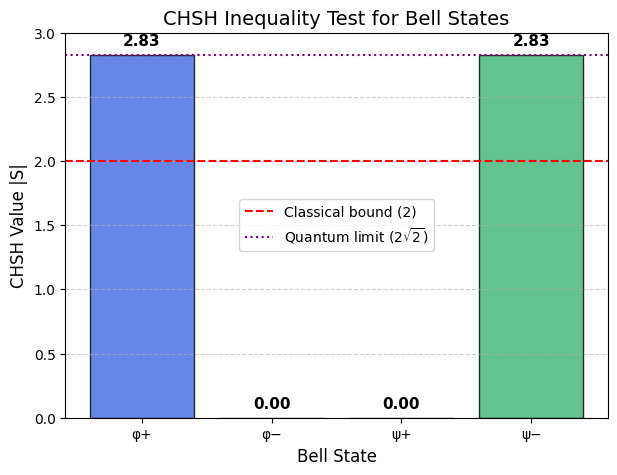

In [10]:
import matplotlib.pyplot as plt


# Evaluate CHSH for each Bell state
states = ["φ+", "φ−", "ψ+", "ψ−"]
values = [chsh_value_estimator(s) for s in ["phi+", "phi-", "psi+", "psi-"]]

# Classical limit (|S| ≤ 2)
classical_limit = 2

# Plot
plt.figure(figsize=(7, 5))
bars = plt.bar(states, values, color=['royalblue', 'tomato', 'gold', 'mediumseagreen'], alpha=0.8, edgecolor='black')
plt.axhline(classical_limit, color='red', linestyle='--', linewidth=1.5, label='Classical bound (2)')
plt.axhline(2*np.sqrt(2), color='purple', linestyle=':', linewidth=1.5, label=r'Quantum limit $(2\sqrt{2})$')

# Add value labels
for bar, val in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width()/2, val + 0.05, f"{val:.2f}",
             ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.title("CHSH Inequality Test for Bell States", fontsize=14)
plt.ylabel("CHSH Value |S|", fontsize=12)
plt.xlabel("Bell State", fontsize=12)
plt.legend()
plt.ylim(0, 3)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()